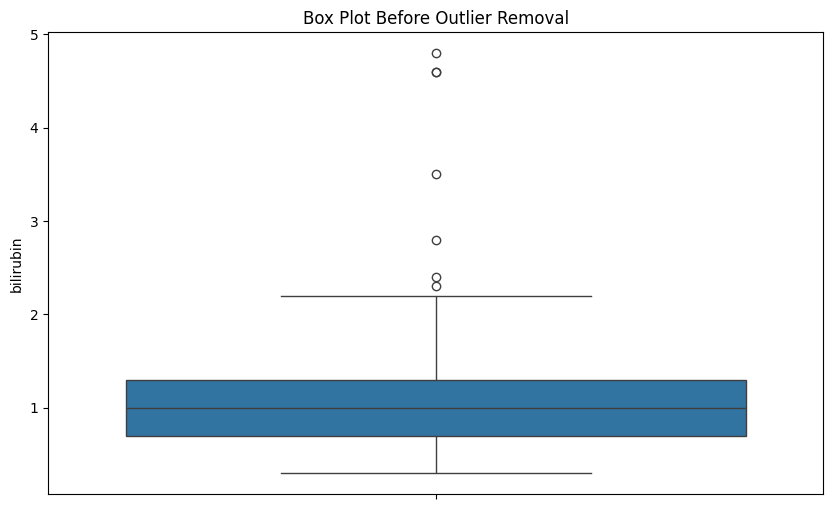

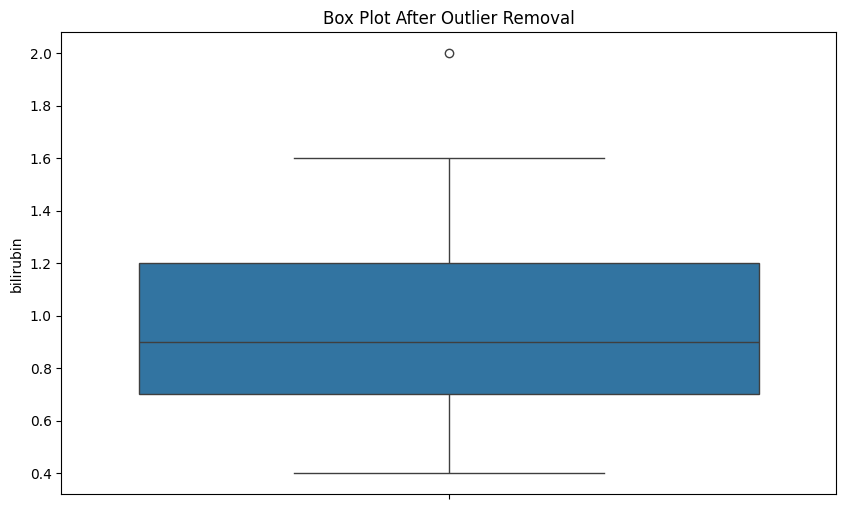

Logistic Regression Accuracy: 0.9090909090909091
Naive Bayes Accuracy: 0.9090909090909091
Difference (Logistic Regression - Naive Bayes): 0.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define column names for the Hepatitis dataset
columns = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
           'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices',
           'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

# Load the dataset
df = pd.read_csv('hepatitis.csv', header=None, names=columns)

# q. Data cleaning: Remove NA, ?, and negative values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric
numeric_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Remove negative values
df = df[(df[numeric_cols] >= 0).all(axis=1)]

# # Introduce some outliers for demonstration (e.g., for 'bilirubin')
# outliers_indices = df.sample(frac=0.05, random_state=42).index
# df.loc[outliers_indices, 'bilirubin'] = df['bilirubin'].max() * 10  # Introducing extreme outliers

# Plotting the boxplot to visualize outliers before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['bilirubin'])
plt.title("Box Plot Before Outlier Removal")
plt.show()

# r. Error correcting: Outlier detection and removal using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Plotting the boxplot to visualize outliers after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['bilirubin'])
plt.title("Box Plot After Outlier Removal")
plt.show()

# s. Data transformation: Encode categorical variables and normalize numerical features
# Encode categorical columns
le = LabelEncoder()
categorical_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
                   'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
                   'varices', 'histology']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Map class: 2 (DIE) to 1, 1 (LIVE) to 0 for binary classification
df['class'] = df['class'].map({2: 1, 1: 0})

# Normalize numerical features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Prepare features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# t. Build models and compare accuracy
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Print results
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Difference (Logistic Regression - Naive Bayes):", logreg_accuracy - nb_accuracy)
